<a href="https://colab.research.google.com/github/AndersonIM/calculadora-metricas-ml/blob/main/M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Calculadora de Métricas de Avaliação de Modelos

Neste projeto, implementamos uma calculadora para as principais métricas de avaliação de modelos de classificação. O objetivo é, a partir de uma **matriz de confusão**, calcular e analisar métricas como acurácia, precisão, sensibilidade (recall), especificidade e F1-score.

A avaliação de um modelo é uma etapa crucial no ciclo de vida de um projeto de Machine Learning, pois nos permite entender o quão bem o modelo está performando e onde ele pode estar errando.

In [3]:
# Função mínima para calcular métricas a partir de uma matriz de confusão
def compute_metrics(VP, VN, FP, FN):
    def safe_div(a, b):
        return a / b if b != 0 else None

    sensibilidade = safe_div(VP, VP + FN)  # recall
    especificidade = safe_div(VN, VN + FP)
    acuracia = safe_div(VP + VN, VP + VN + FP + FN)
    precisao = safe_div(VP, VP + FP)

    if precisao is None or sensibilidade is None or (precisao + sensibilidade) == 0:
        f1 = None
    else:
        f1 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    return {
        "sensibilidade": sensibilidade,
        "especificidade": especificidade,
        "acuracia": acuracia,
        "precisao": precisao,
        "f1_score": f1,
    }

def mostrar_resultados(VP, VN, FP, FN):
    print(f"VP={VP}, VN={VN}, FP={FP}, FN={FN}")
    metrics = compute_metrics(VP, VN, FP, FN)
    for nome, valor in metrics.items():
        if valor is None:
            print(f"{nome:15}: indefinido (divisão por zero)")
        else:
            print(f"{nome:15}: {valor:.4f}")

# Exemplo fixo para testar
mostrar_resultados(VP=50, VN=40, FP=10, FN=5)

VP=50, VN=40, FP=10, FN=5
sensibilidade  : 0.9091
especificidade : 0.8000
acuracia       : 0.8571
precisao       : 0.8333
f1_score       : 0.8696


## O que é uma Matriz de Confusão?

A matriz de confusão é uma tabela que nos permite visualizar o desempenho de um algoritmo de classificação. Ela compara os valores reais com as previsões do modelo e os divide em quatro categorias:

* **Verdadeiro Positivo (VP):** O modelo previu "Sim" e o valor real era "Sim". **(Acerto)**
* **Verdadeiro Negativo (VN):** O modelo previu "Não" e o valor real era "Não". **(Acerto)**
* **Falso Positivo (FP):** O modelo previu "Sim", mas o valor real era "Não". Também conhecido como **Erro Tipo I**.
* **Falso Negativo (FN):** O modelo previu "Não", mas o valor real era "Sim". Também conhecido como **Erro Tipo II**.

A seguir, nosso código utiliza esses quatro valores para calcular as métricas.

In [4]:
# Pede os valores ao usuário e calcula as métricas
try:
    VP = int(input("VP (verdadeiros positivos): "))
    VN = int(input("VN (verdadeiros negativos): "))
    FP = int(input("FP (falsos positivos): "))
    FN = int(input("FN (falsos negativos): "))
    mostrar_resultados(VP, VN, FP, FN)
except ValueError:
    print("Por favor, insira apenas números inteiros.")


VP (verdadeiros positivos): 100
VN (verdadeiros negativos): 50
FP (falsos positivos): 30
FN (falsos negativos): 60
VP=100, VN=50, FP=30, FN=60
sensibilidade  : 0.6250
especificidade : 0.6250
acuracia       : 0.6250
precisao       : 0.7692
f1_score       : 0.6897


## Descrição das Métricas Calculadas

Cada métrica nos dá uma visão diferente sobre o desempenho do modelo. É importante não analisá-las de forma isolada.

* **Acurácia:**
    * **Fórmula:** `(VP + VN) / (VP + VN + FP + FN)`
    * **O que significa?** Mede a proporção geral de previsões corretas. É uma boa métrica inicial, mas pode ser enganosa se os dados forem desbalanceados (por exemplo, muito mais "Não" do que "Sim").

* **Precisão:**
    * **Fórmula:** `VP / (VP + FP)`
    * **O que significa?** De todas as vezes que o modelo previu "Positivo", quantas estavam corretas? É uma métrica crucial quando o custo de um **Falso Positivo** é alto (ex: diagnosticar erroneamente uma pessoa saudável com uma doença).

* **Sensibilidade (Recall):**
    * **Fórmula:** `VP / (VP + FN)`
    * **O que significa?** De todos os casos que eram realmente "Positivos", quantos o modelo conseguiu identificar? É vital quando o custo de um **Falso Negativo** é alto (ex: não detectar uma fraude ou uma doença grave).

* **Especificidade:**
    * **Fórmula:** `VN / (VN + FP)`
    * **O que significa?** De todos os casos que eram realmente "Negativos", quantos o modelo conseguiu identificar corretamente? É o oposto da sensibilidade.

* **F1-Score:**
    * **Fórmula:** `2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)`
    * **O que significa?** É a média harmônica entre precisão e sensibilidade. Busca um equilíbrio entre as duas, sendo muito útil quando ambos os tipos de erro (FP e FN) são igualmente indesejáveis.

VP (verdadeiros positivos): 40
VN (verdadeiros negativos): 30
FP (falsos positivos): 33
FN (falsos negativos): 44
VP=40, VN=30, FP=33, FN=44
sensibilidade  : 0.4762
especificidade : 0.4762
acuracia       : 0.4762
precisao       : 0.5479
f1_score       : 0.5096


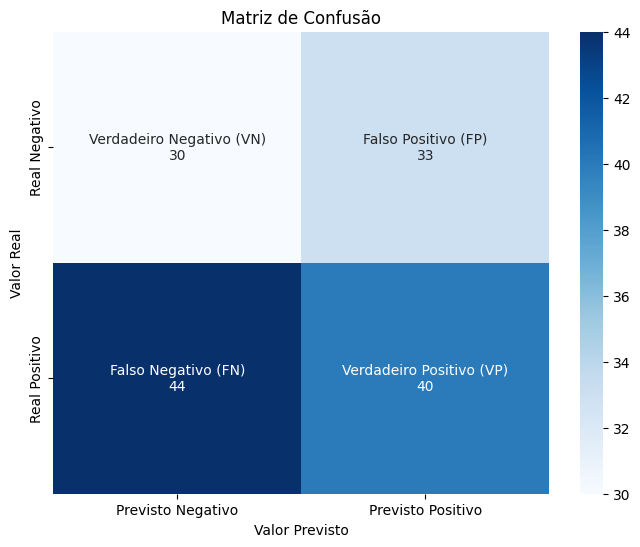

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(VP, VN, FP, FN):
    # Monta a matriz de confusão
    cm = np.array([[VN, FP],
                   [FN, VP]])

    # Nomes dos eixos
    group_names = ['Verdadeiro Negativo (VN)', 'Falso Positivo (FP)', 'Falso Negativo (FN)', 'Verdadeiro Positivo (VP)']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    # Plotagem
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
                xticklabels=['Previsto Negativo', 'Previsto Positivo'],
                yticklabels=['Real Negativo', 'Real Positivo'])
    plt.title('Matriz de Confusão')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Previsto')
    plt.show()

# Pede os valores ao usuário e calcula/mostra tudo
try:
    VP = int(input("VP (verdadeiros positivos): "))
    VN = int(input("VN (verdadeiros negativos): "))
    FP = int(input("FP (falsos positivos): "))
    FN = int(input("FN (falsos negativos): "))

    # Mostra os resultados numéricos
    mostrar_resultados(VP, VN, FP, FN)

    # Mostra a visualização
    plot_confusion_matrix(VP, VN, FP, FN)

except ValueError:
    print("Por favor, insira apenas números inteiros.")

## Conclusão

Este projeto demonstrou com sucesso a implementação de uma calculadora de métricas de avaliação a partir de uma matriz de confusão. A ferramenta criada permite que qualquer usuário insira os valores de VP, VN, FP e FN para obter uma análise completa do desempenho de um modelo de classificação.

O principal aprendizado é que a análise de um modelo não deve se basear em uma única métrica. A combinação de acurácia, precisão, sensibilidade e F1-score oferece uma visão muito mais rica e contextualizada, permitindo tomar decisões mais informadas sobre a otimização e a implantação do modelo.